# Colorado Wildflower Classification Using Tensorflow

In [3]:
import tensorflow as tf
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


2023-06-22 12:34:00.270124: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
data_dir = 'dataset'  
# Define the parameters for loading the dataset
batch_size = 32
img_height, img_width = 224, 224
validation_split = 0.2
test_split = 0.1
seed = 42

# Load the dataset and split it into training, validation, and test sets
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="training",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=validation_split,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=test_split,
    subset="validation",
    seed=seed,
    image_size=(img_height, img_width),
    batch_size=batch_size
)

# Get the class names from the dataset
class_names = train_dataset.class_names



Found 43660 files belonging to 164 classes.
Using 34928 files for training.
Found 43660 files belonging to 164 classes.
Using 8732 files for validation.
Found 43660 files belonging to 164 classes.
Using 4366 files for validation.


In [8]:
# Shuffle the training dataset
train_dataset = train_dataset.shuffle(len(train_dataset), seed=seed)
# Configure the training parameters
epochs = 12

# Create the base model with a pretrained head
base_model = tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))
base_model.trainable = False  # Freeze the base model

# Add a classification head
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(len(class_names), activation='softmax')
])


In [9]:

# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


In [10]:

# Train the model
history = model.fit(train_dataset,
                    epochs=epochs,
                    validation_data=val_dataset)


Epoch 1/12


2023-06-22 12:37:00.961522: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [34928]
	 [[{{node Placeholder/_0}}]]
2023-06-22 12:37:00.961886: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [34928]
	 [[{{node Placeholder/_0}}]]


1092/1092 [==============================] - ETA: 0s - loss: 1.2700 - accuracy: 0.6957

2023-06-22 12:58:15.767766: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [8732]
	 [[{{node Placeholder/_0}}]]
2023-06-22 12:58:15.768083: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [8732]
	 [[{{node Placeholder/_4}}]]


1092/1092 [==============================] - 1591s 1s/step - loss: 1.2700 - accuracy: 0.6957 - val_loss: 0.7334 - val_accuracy: 0.8058
Epoch 2/12
1092/1092 [==============================] - 1621s 1s/step - loss: 0.4676 - accuracy: 0.8710 - val_loss: 0.6453 - val_accuracy: 0.8315
Epoch 3/12
1092/1092 [==============================] - 1589s 1s/step - loss: 0.2979 - accuracy: 0.9189 - val_loss: 0.6197 - val_accuracy: 0.8409
Epoch 4/12
1092/1092 [==============================] - 1565s 1s/step - loss: 0.2030 - accuracy: 0.9440 - val_loss: 0.6436 - val_accuracy: 0.8374
Epoch 5/12
1092/1092 [==============================] - 1578s 1s/step - loss: 0.1442 - accuracy: 0.9609 - val_loss: 0.5968 - val_accuracy: 0.8518
Epoch 6/12
1092/1092 [==============================] - 1603s 1s/step - loss: 0.1126 - accuracy: 0.9703 - val_loss: 0.6395 - val_accuracy: 0.8428
Epoch 7/12
1092/1092 [==============================] - 1575s 1s/step - loss: 0.0871 - accuracy: 0.9781 - val_loss: 0.6331 - val_accura

137/137 [==============================] - 157s 1s/step - loss: 0.6768 - accuracy: 0.8552
Test loss: 0.6768487095832825
Test accuracy: 0.855245053768158


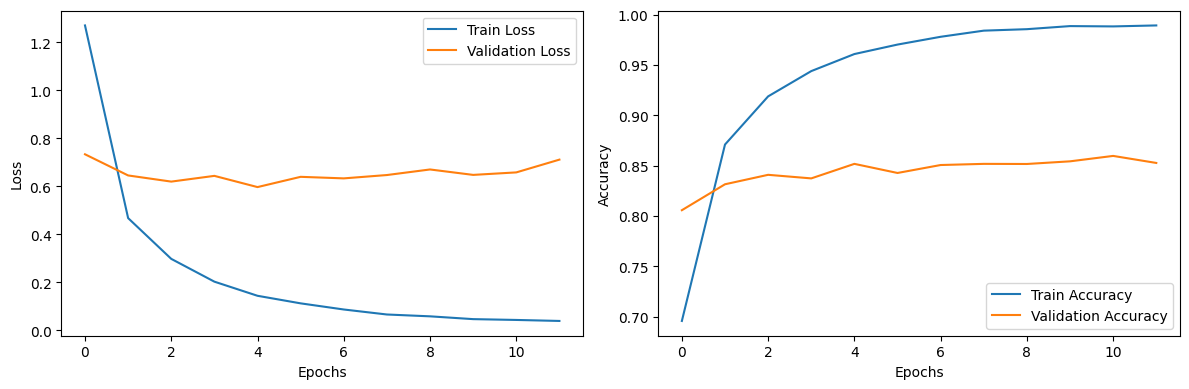

<Figure size 640x480 with 0 Axes>

In [11]:

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_dataset)
print("Test loss:", test_loss)
print("Test accuracy:", test_acc)

# Plot the training curves
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [12]:
model.save('classification/saved/wildflower_classifier_v2.h5')

In [13]:
model = tf.keras.models.load_model('classification/saved/wildflower_classifier_v2.h5')


In [14]:
import tensorflow as tf
from tqdm import tqdm

def preprocess_image(image):
    img = tf.image.decode_jpeg(image, channels=3)
    img = tf.image.resize(img, (224, 224))  # Adjust the size as per your requirements
    img = tf.keras.applications.resnet.preprocess_input(img)  # Preprocess the image
    return img


def top_n_accuracy(n, test_dataset):
    class_names = test_dataset.class_names
    res = []

    for images, labels in tqdm(test_dataset):
        predictions = model.predict(images,verbose=0)
        top_n_indices = tf.argsort(predictions, axis=1, direction='DESCENDING')[:, :n]
        top_3_labels = [[class_names[i] for i in index] for index in top_n_indices]
        
        for true_label, top_preds in zip(labels, top_n_indices):
            if true_label in top_preds:
                res.append(1)
            else:
                res.append(0)
        

    accuracy = sum(res) / len(res)
    return accuracy




In [15]:
  # Number of top predictions

accuracy = top_n_accuracy(3, test_dataset)
print(f"Top-{3} accuracy: {accuracy}")

accuracy = top_n_accuracy(5, test_dataset)
print(f"Top-{5} accuracy: {accuracy}")



100%|██████████| 137/137 [02:49<00:00,  1.24s/it]


Top-3 accuracy: 0.9482363719651855


100%|██████████| 137/137 [02:49<00:00,  1.24s/it]

Top-5 accuracy: 0.9686211635364178
